In [1]:
import numpy as np, sys
import cv2
import matplotlib.pyplot as plt

from matplotlib.pyplot import imshow
%matplotlib inline

# Exercise 1 Drawing 
Draw ellipse in the center of a black image

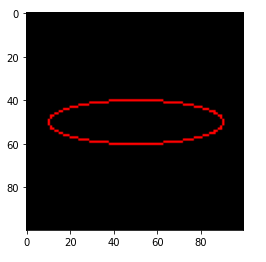

## Solution

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(768, 1280, 3)
Resized Dimensions :  (100, 100, 3)


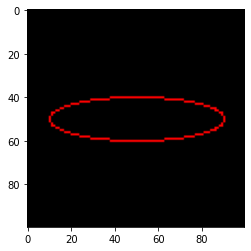

In [3]:
# path 
path = r'/content/gdrive/MyDrive/Colab Notebooks/EyeGauge/images/black.png'

# Reading an image in default mode
image = cv2.imread(path)
print(image.shape)

# resize of image
scale_percent = 20 # percent of original size
width = int(100)
height = int(100)
dim = (width, height)

resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
imshow(resized)
 
print('Resized Dimensions : ',resized.shape)

# Window name in which image is displayed
window_name = 'Image'
   
center_coordinates = (50, 50)
  
axesLength = (40, 10)
  
angle = 0
  
startAngle = 0
  
endAngle = 360
   
# Red color in RGB
color = (255, 0, 0)
   
# Line thickness of 1 px
thickness = 1
   
# Using cv2.ellipse() method
# Draw a ellipse with red line borders of thickness of 1 px
image = cv2.ellipse(resized, center_coordinates, axesLength,
           angle, startAngle, endAngle, color, thickness)

# Displaying the image 
imshow(image) 

# Exercise 2
Apply to the first image (images/morpho.png) transformations to get the second and the third image
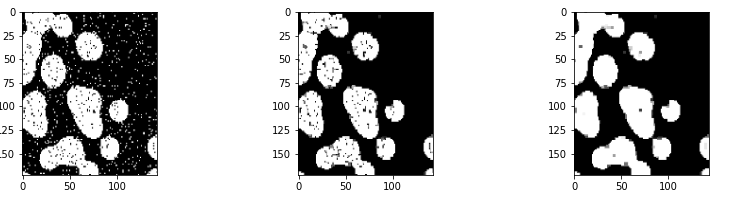

## Solution

In [4]:
# path 
path = r'/content/gdrive/MyDrive/Colab Notebooks/EyeGauge/images/morpho.png'

# Reading an image in default mode
image = cv2.imread(path)
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)


In [5]:
titles=["image","Transformation 1", "Transformation 2"]
images=[image, opening, closing]

<function matplotlib.pyplot.show>

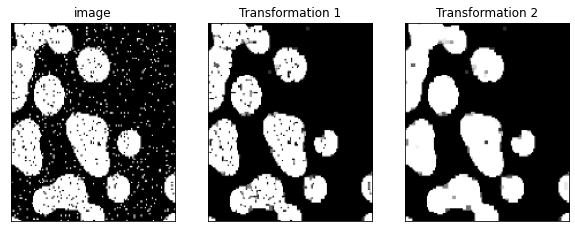

In [6]:
# Plotting the image and the mask
plt.figure(figsize=(10,20))
for i in range(3):
  plt.subplot(1, 3, i+1), plt.imshow(images[i], "gray")
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show  

# Exercise 3
Place logo (images/logo.jpg) at the image (images/track.jpg) to cover the starting cell number 2

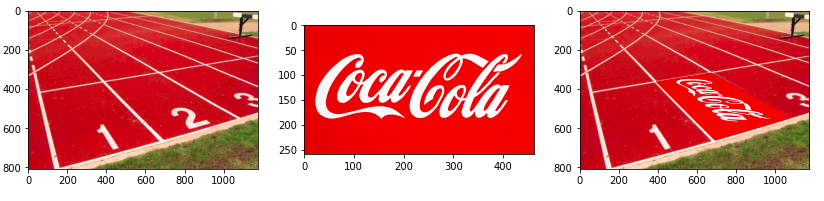


## Solution

<function matplotlib.pyplot.show>

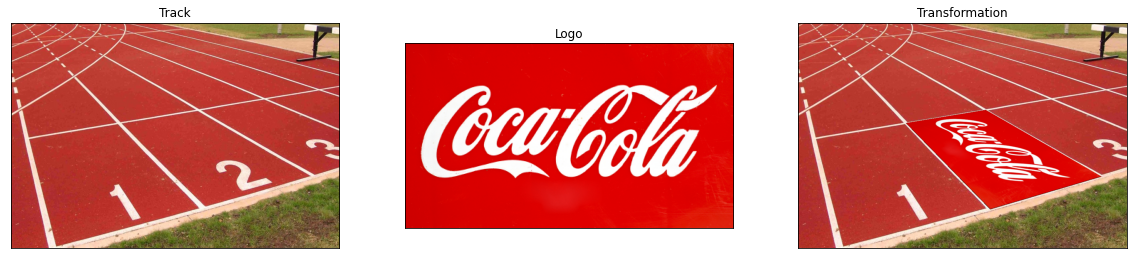

In [10]:
logo = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/EyeGauge/images/logo.jpg')
track = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/EyeGauge/images/track.jpg')

logo = logo[:, :, ::-1] #BGR2RGB
track = track[:, :, ::-1] #BGR2RGB

h1,w1 = logo.shape[:2]

pts1=np.float32([[0,0],[w1,0],[0,h1],[w1,h1]])
pts2 = np.float32([[670, 314], [1083, 552], [385, 361], [686, 669]] )

positions2 = [[670, 314], [1083, 552], [686, 669], [385, 361]]


h, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC,5.0)


height, width, channels = track.shape
im1Reg = cv2.warpPerspective(logo, h, (width, height))

mask2 = np.zeros(track.shape, dtype=np.uint8)

roi_corners2 = np.int32(positions2)

channel_count2 = track.shape[2]  
ignore_mask_color2 = (255,)*channel_count2

cv2.fillConvexPoly(mask2, roi_corners2, ignore_mask_color2)


mask2 = cv2.bitwise_not(mask2)
masked_image2 = cv2.bitwise_and(track, mask2)

#Using Bitwise or to merge the two images
#im1Reg = im1Reg[:, :, ::-1]  #BGR2RGB
#masked_image2 = masked_image2[:, :, ::-1] #BGR2RGB
final = cv2.bitwise_or(im1Reg, masked_image2)
#imshow(final)
cv2.imwrite('final.png',final)

titles=["Track","Logo", "Transformation"]
images=[track, logo, final]

# Plotting the image and the mask
plt.figure(figsize=(20,20))
for i in range(3):
  plt.subplot(1, 3, i+1), plt.imshow(images[i], "gray")
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show  